# Feature Selection Advanced House Price Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [3]:
dataset = pd.read_csv('X_train.csv')
dataset.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan,MasVnrTypenan,BsmtQualnan,BsmtCondnan,BsmtExposurenan,BsmtFinType1nan,BsmtFinType2nan,GarageTypenan,GarageFinishnan,GarageQualnan,GarageCondnan
0,1,12.247694,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500,0.0,0.0,0.0,1.0,0.5,0.0,-0.652174,-0.243243,0.0,0.0,0.500000,0.428571,1.0,1.193303,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.452790,0.0,0.0,-0.559829,-0.269652,0.0,0.0,0.0,0.0,0.0,1.173077,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,-1.0,-0.333333,0.0,-0.571429,0.0,0.0,0.281573,0.0,0.0,0.0,0.000000,0.529412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,12.109011,-0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.125,-1.0,0.0,0.0,0.0,0.0,3.0,-0.086957,0.459459,0.0,0.0,-0.500000,-0.571429,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,3.0,0.5,0.834679,0.0,0.0,-0.330769,0.538308,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.074534,0.0,0.0,-0.082816,0.0,0.0,0.0,1.773810,-0.367647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.333333,-0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,12.317167,0.2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.500,0.0,0.0,0.0,1.0,0.5,0.0,-0.608696,-0.216216,0.0,0.0,0.500000,0.428571,1.0,0.986301,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.143910,0.0,0.0,-0.074359,-0.142289,0.0,0.0,0.0,0.0,0.0,1.189560,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.333333,0.0,-0.521739,0.0,0.0,0.530021,0.0,0.0,0.0,0.000000,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,11.849398,0.4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.750,0.0,0.0,0.0,1.0,0.5,0.0,1.217391,0.594595,0.0,0.0,-0.833333,-0.428571,0.0,0.000000,0.0,0.0,-0.5,-1.0,1.0,0.0,0.5,-0.235170,0.0,0.0,0.106838,-0.468657,0.0,-0.5,0.0,0.0,0.0,1.038462,0.0,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.5,0.0,0.0,0.666667,-1.0,-0.496894,-1.0,1.0,0.670807,0.0,0.0,0.0,0.000000,0.147059,272.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.333333,-1.0,0.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,12.429216,0.2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.500,0.0,0.0,0.0,1.0,1.0,0.0,-0.586957,-0.162162,0.0,0.0,0.500000,0.428571,1.0,2.130898,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.381186,0.0,0.0,0.021368,0.305473,0.0,0.0,0.0,0.0,0.0,1.446429,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.5,0.0,0.0,0.333333,0.0,-0.496894,0.0,1.0,1.474120,0.0,0.0,0.0,1.142857,0.867647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
## Capture the dependent feature
y_train = dataset[['SalePrice']]

In [19]:
## drop dependent feature fron dataset
X_train = dataset.drop(['Id','SalePrice'],axis=1)
df = X_train.copy()
df_t = y_train.copy()

In [6]:
# Lets step by step do feature selection use all technique and find best feature
# Lets check it have any duplicate columns and row
# This function take a dataframe
# as a parameter and returning list
# of column names whose contents 
# are duplicates.
def getDuplicateColumns(df):
     
    # Create an empty set
    duplicateColumnNames = set()
      
    # Iterate through all the columns 
    # of dataframe
    for x in range(df.shape[1]):
          
        # Take column at xth index.
        col = df.iloc[:, x]
        
        # Iterate through all the columns in
        # DataFrame from (x + 1)th index to
        # last index
        for y in range(x + 1, df.shape[1]):
              
            # Take column at yth index.
            otherCol = df.iloc[:, y]
              
            # Check if two columns at x & y
            # index are equal or not,
            # if equal then adding 
            # to the set
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
                
         # Return list of unique column names 
       # whose contents are duplicates.
    return list(duplicateColumnNames)         
                

In [10]:
# Get list of duplicate columns
duplicateColNames = getDuplicateColumns(df)

In [11]:
print('Duplicate Columns are :')

# Iterate through duplicate
    # column names
for column in duplicateColNames :
       print('Column Name : ', column)

Duplicate Columns are :
Column Name :  BsmtCondnan
Column Name :  GarageCondnan
Column Name :  BsmtFinType1nan
Column Name :  GarageTypenan
Column Name :  MasVnrTypenan
Column Name :  GarageQualnan
Column Name :  GarageFinishnan


In [12]:
# To remove the duplicate row is:
dublicate_row = df[df.duplicated(subset=None,keep='first')]

In [13]:
print("Duplicate Rows except first occurrence based on all columns are :")
print(dublicate_row)

Duplicate Rows except first occurrence based on all columns are :
Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, Sa

Means no duplicate row but we duplicate column
lets see wht we do

## Univariate Analysis

In [15]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
df.shape

(1460, 92)

In [16]:
### Apply SelectKBest Algorithm
## here we apply chi2 to select the feature based on the hypothesis
## we cant use this bcz x have negative value
ordered_rank_features = SelectKBest(score_func=chi2,k=25)
ordered_feature = ordered_rank_features.fit(df,df_t)

ValueError: Input X must be non-negative.

### Feature Importance

In [21]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(df,df_t)

<ipython-input-21-3b8910050c68>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(df,df_t)


ExtraTreesRegressor()

In [22]:
print(model.feature_importances_)

[6.94064553e-03 1.08637102e-02 1.38513644e-03 9.87344240e-05
 6.48930710e-05 1.63261829e-03 3.25360596e-03 3.26657314e-03
 3.22220054e-05 2.24835985e-03 2.37596650e-03 9.37643604e-02
 1.62134616e-03 3.11595991e-04 1.40190332e-03 2.90906009e-03
 1.88333236e-01 5.46681718e-03 1.12882543e-02 6.59944236e-03
 2.87740472e-03 5.21474961e-04 2.49430879e-03 2.59276187e-03
 1.90228830e-03 3.26695921e-03 1.16348171e-01 4.12981231e-03
 2.40491341e-03 5.04326934e-02 1.84338023e-03 3.86806942e-03
 2.95404743e-03 1.08027454e-02 1.08451631e-03 1.21988070e-03
 3.12824589e-03 1.93220427e-02 7.57606675e-04 2.93231326e-03
 2.96535225e-02 1.08767680e-03 2.74094097e-04 1.35018099e-02
 2.80686880e-04 6.02102344e-04 6.75758916e-03 9.63958077e-04
 4.47842733e-02 5.18520052e-03 1.12104472e-02 8.82699162e-04
 9.06710956e-02 1.54271816e-02 1.63160984e-03 1.63996515e-02
 2.95967563e-02 8.31842889e-03 2.79740716e-03 1.22719238e-02
 6.63878705e-02 2.15873209e-02 1.19974018e-03 7.06439869e-04
 2.30260722e-03 3.402729

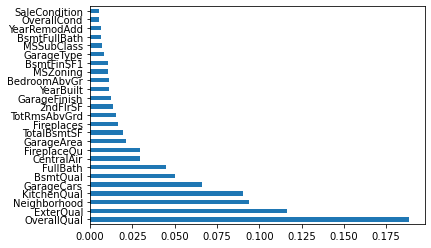

In [24]:
ranked_features=pd.Series(model.feature_importances_,index=df.columns)
ranked_features.nlargest(25).plot(kind='barh')
plt.show()

### Correlation

In [25]:
df.corr()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan,MasVnrTypenan,BsmtQualnan,BsmtCondnan,BsmtExposurenan,BsmtFinType1nan,BsmtFinType2nan,GarageTypenan,GarageFinishnan,GarageQualnan,GarageCondnan
MSSubClass,1.000000,-0.211535,-0.306265,-0.268636,-0.024969,-0.105995,-0.103700,-0.027856,0.022844,-0.053177,-0.025672,-0.024106,-0.027032,-0.042011,-0.340538,0.183527,0.032628,-0.059316,-0.028746,-0.041968,-0.135084,-0.029924,0.005380,-0.018772,0.028615,0.023573,0.016178,-0.030624,0.054655,0.076820,-0.005152,0.054925,0.126858,-0.069836,0.051679,-0.065649,-0.140759,-0.238518,-0.039799,-0.019458,-0.101774,0.023292,-0.020141,0.307886,0.046474,0.031648,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,-0.012383,0.040380,-0.005567,-0.045569,-0.039267,-0.058821,-0.062315,-0.012301,-0.040110,-0.098672,0.052228,-0.004159,-0.059925,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,0.008610,0.117495,0.028204,-0.007683,-0.013585,-0.021407,-0.021909,-0.029423,-0.015323,-0.016496,0.085357,-0.016496,0.015439,0.015439,0.015555,0.015439,0.011486,0.085357,0.085357,0.085357,0.085357
MSZoning,-0.211535,1.000000,0.251129,0.221516,0.084606,0.221947,0.187166,0.045657,-0.009400,0.095729,0.006208,0.553530,0.122349,0.091497,0.118228,0.187549,0.269302,-0.146350,-0.460736,-0.240519,0.054911,0.035325,0.193364,0.202132,0.147058,0.125409,0.274595,0.151202,0.284754,0.285338,0.138117,0.090034,0.118456,0.170059,-0.055974,0.035922,0.046960,0.237309,0.099890,0.199776,0.254369,0.177141,0.019244,-0.007883,-0.105732,0.006118,0.120119,0.025223,0.266772,0.168978,0.105903,-0.111713,0.247010,0.121840,0.076643,0.170517,0.169354,0.307919,-0.297066,0.274365,0.253433,0.255667,0.116170,0.146075,0.289688,0.125597,0.092446,-0.224789,0.032781,0.024213,0.024663,0.024921,0.040971,0.020753,0.000786,-0.004702,0.010486,0.132537,0.124343,0.092355,0.061642,-0.138661,0.061642,0.008589,0.008589,0.010023,0.008589,0.010023,-0.138661,-0.138661,-0.138661,-0.138661
LotFrontage,-0.306265,0.251129,1.000000,0.666966,-0.008650,-0.032952,0.064701,0.014969,-0.003525,0.045691,0.030393,0.187496,-0.022721,-0.013719,0.256219,-0.034736,0.095831,-0.014158,0.001070,-0.056298,0.070051,0.018131,-0.031049,-0.027921,-0.029374,-0.055838,0.092856,-0.012651,0.078605,0.043487,0.005194,-0.004685,0.026392,0.038672,-0.020478,-0.013897,0.088582,0.124316,-0.019031,0.112174,-0.035523,-0.037975,-0.004796,-0.017626,0.016191,-0.005262,0.010572,0.010760,0.100543,-0.082881,0.104959,0.028473,0.064803,0.109846,-0.032922,0.087903,0.104291,0.040358,-0.021129,0.102435,0.165998,0.147990,-0.012013,-0.025096,-0.018150,0.013985,0.035903,0.048384,0.015665,0.036384,0.009249,0.009346,-0.026994,-0.025474,0.011807,0.006457,-0.006984,0.045685,0.053572,0.021859,0.009995,-0.103109,0.009995,0.021713,0.021713,0.022012,0.021713,0.022012,-0.103109,-0.103109,-0.103109,-0.103109
LotArea,-0.268636,0.221516,0.666966,1.000000,-0.006603,-0.025153,0.067534,0.011426,-0.002691,0.049933,0.023200,0.141426,-0.004721,-0.010472,0.148332,-0.002740,0.074076,-0.019036,0.001494,-0.033083,0.053473,0.013840,-0.023196,-0.021759,0.005540,-0.017171,0.070881,-0.017369,0.066764,0.010667,0.003965,-0.014226,-0.025206,0.037927,-0.034334,0.005

<AxesSubplot:>

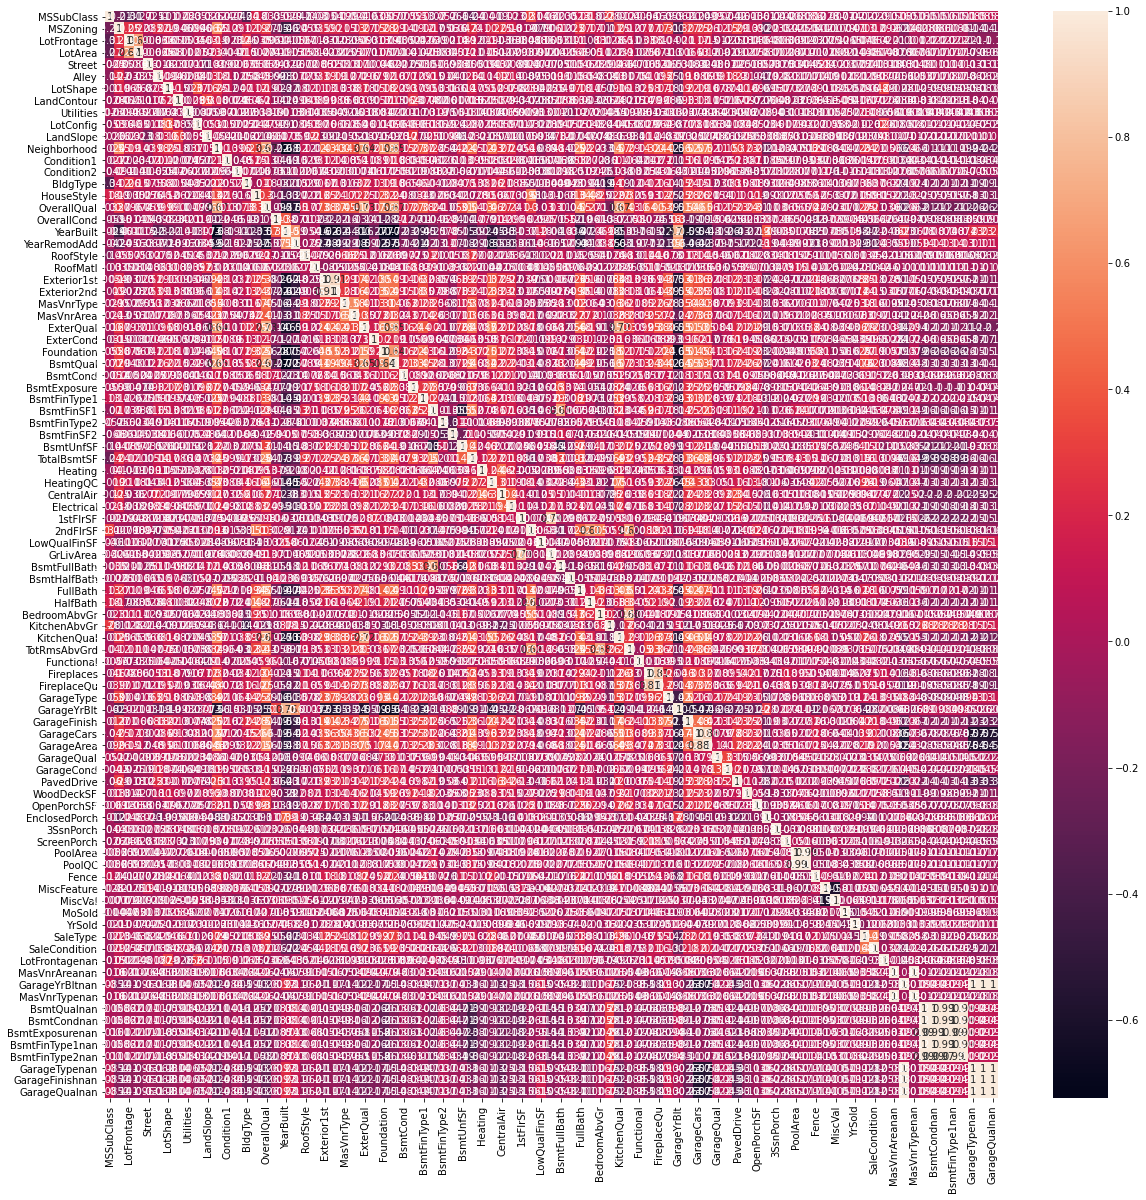

In [26]:
#Here we remove the Dependent feature and find the correlation
import seaborn as sns
corr=df.corr()
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_features].corr(),annot=True)

In [27]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [30]:
correlation(df,0.8)

{'BsmtCondnan',
 'BsmtExposurenan',
 'BsmtFinType1nan',
 'BsmtFinType2nan',
 'Exterior2nd',
 'FireplaceQu',
 'GarageArea',
 'GarageCondnan',
 'GarageFinishnan',
 'GarageQualnan',
 'GarageTypenan',
 'MasVnrTypenan',
 'PoolQC'}

### Information Gain

In [33]:
from sklearn.feature_selection import mutual_info_regression
mutual_info=mutual_info_regression(df,df_t)
mutual_data=pd.Series(mutual_info,index=df.columns)
mutual_data.sort_values(ascending=False)

D:\lal\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


OverallQual     0.571009
Neighborhood    0.506108
GarageArea      0.364194
GarageCars      0.362053
TotalBsmtSF     0.360206
                  ...   
MoSold          0.000000
MiscFeature     0.000000
PoolArea        0.000000
3SsnPorch       0.000000
1stFlrSF        0.000000
Length: 92, dtype: float64

<AxesSubplot:>

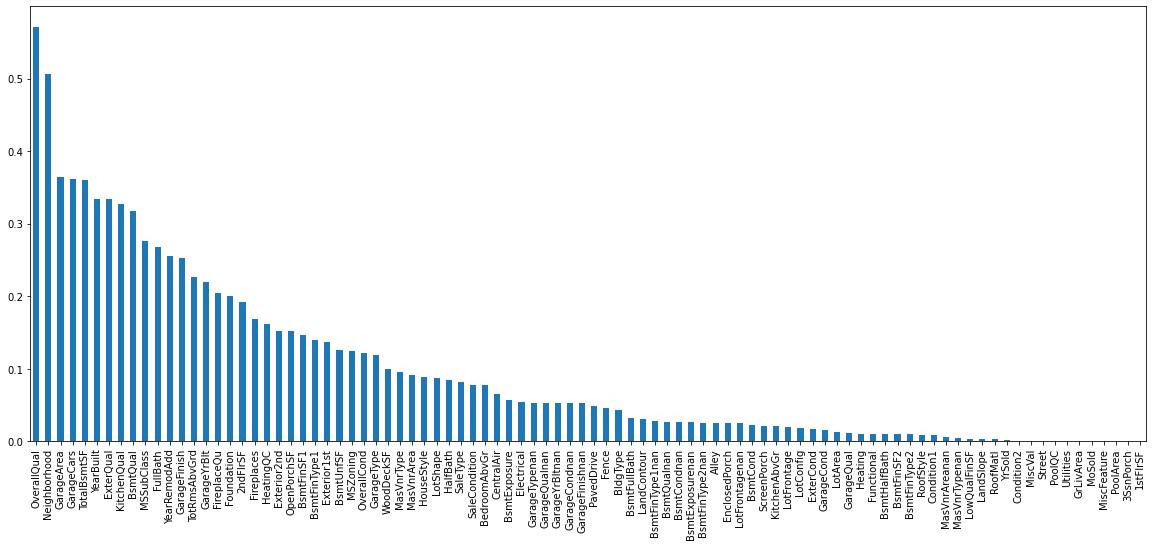

In [35]:
#let's plot the ordered mutual_info values per feature
mutual_data.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [37]:
from sklearn.feature_selection import SelectKBest
#Now we Will select the  top 5 important features
sel_five_cols = SelectKBest(mutual_info_regression, k=25)
sel_five_cols.fit(df, df_t)
df.columns[sel_five_cols.get_support()]

D:\lal\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Index(['MSSubClass', 'Neighborhood', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtFinType1', 'BsmtFinSF1', 'TotalBsmtSF', 'HeatingQC',
       '2ndFlrSF', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'OpenPorchSF'],
      dtype='object')

In [38]:
from sklearn.feature_selection import SelectPercentile
## Selecting the top 20 percentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=20)
selected_top_columns.fit(df,df_t)

D:\lal\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SelectPercentile(percentile=20,
                 score_func=<function mutual_info_regression at 0x000000000BB4DAF0>)

In [39]:

df.columns[selected_top_columns.get_support()]

Index(['MSSubClass', 'Neighborhood', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'ExterQual', 'Foundation', 'BsmtQual', 'TotalBsmtSF',
       '2ndFlrSF', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea'],
      dtype='object')

In [43]:
import statsmodels.api as sm
def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [44]:
forward_selection(df,df_t)

<ipython-input-43-66a4d2c172be>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-43-66a4d2c172be>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-43-66a4d2c172be>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-43-66a4d2c172be>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


<ipython-input-43-66a4d2c172be>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-43-66a4d2c172be>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-43-66a4d2c172be>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-43-66a4d2c172be>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


['OverallQual',
 'Neighborhood',
 'TotRmsAbvGrd',
 'BsmtFinSF1',
 'GarageCars',
 'OverallCond',
 'TotalBsmtSF',
 'GarageType',
 'Fireplaces',
 'HeatingQC',
 'MSZoning',
 '2ndFlrSF',
 'BsmtQual',
 'BsmtFullBath',
 'SaleCondition',
 'CentralAir',
 'ScreenPorch',
 'WoodDeckSF',
 'KitchenQual',
 'MSSubClass',
 'BsmtExposure',
 'FullBath',
 'LotConfig',
 'GarageQual',
 'HalfBath',
 'GarageYrBlt',
 'GrLivArea',
 'PoolQC',
 'PoolArea',
 'BsmtCondnan',
 'BsmtFinType1nan',
 'BsmtQualnan',
 'Foundation',
 'EnclosedPorch',
 'PavedDrive',
 'YearRemodAdd',
 'LowQualFinSF',
 'GarageArea',
 'Condition2',
 'Functional',
 'Condition1',
 'YrSold',
 'LandSlope',
 'GarageCond',
 'Street',
 '3SsnPorch',
 'GarageFinish',
 'HouseStyle']

In [47]:
#Sequential backward selection(sbs)
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
sbs = SFS(LinearRegression(),
         k_features=25,
         forward=False,
         floating=False,
         cv=0)
sbs.fit(df,df_t)
sbs.k_feature_names_

('MSSubClass',
 'MSZoning',
 'Neighborhood',
 'OverallQual',
 'OverallCond',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'HeatingQC',
 'CentralAir',
 '2ndFlrSF',
 'BsmtFullBath',
 'FullBath',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'PavedDrive',
 'WoodDeckSF',
 'ScreenPorch',
 'PoolArea',
 'PoolQC',
 'SaleCondition')

In [50]:
## for feature slection

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

### Apply Feature Selection
# first, I specify the Lasso Regression model, and I
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

# Then I use the selectFromModel object from sklearn, which
# will select the features which coefficients are non-zero

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(df,df_t)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [52]:
feature_sel_model.get_support()

array([ True,  True, False, False, False, False, False, False, False,
        True, False,  True, False, False, False, False,  True,  True,
        True,  True, False, False, False, False, False,  True, False,
       False,  True,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False, False, False,  True,  True,
       False,  True, False,  True,  True,  True, False,  True,  True,
        True,  True, False,  True, False,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True, False,
        True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [54]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = df.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((df.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 92
selected features: 39


NameError: name 'sel_' is not defined

In [55]:
selected_feat

Index(['MSSubClass', 'MSZoning', 'LotConfig', 'Neighborhood', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF',
       'HeatingQC', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'Fence', 'SaleCondition'],
      dtype='object')

In [67]:
X_train=df[selected_feat]

In [68]:
X_train.head()

,MSSubClass,MSZoning,LotConfig,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,Foundation,BsmtQual,BsmtExposure,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,HeatingQC,2ndFlrSF,LowQualFinSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,SaleCondition
0,0.2,0.0,0.0,0.500,0.5,0.0,-0.652174,-0.243243,1.193303,1.0,0.0,0.0,0.452790,0.0,-0.269652,0.0,1.173077,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,-1.0,0.0,0.0,0.0,0.281573,0.0,0.000000,0.529412,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.6,0.0,2.0,0.125,0.0,3.0,-0.086957,0.459459,0.000000,0.0,0.0,3.0,0.834679,0.0,0.538308,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.082816,0.0,1.773810,-0.367647,0.0,0.0,0.0,0.0,0.0,0.0
2,0.2,0.0,0.0,0.500,0.5,0.0,-0.608696,-0.216216,0.986301,1.0,0.0,1.0,0.143910,0.0,-0.142289,0.0,1.189560,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.530021,0.0,0.000000,0.250000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.4,0.0,1.0,0.750,0.5,0.0,1.217391,0.594595,0.000000,-0.5,-1.0,0.0,-0.235170,0.0,-0.468657,-0.5,1.038462,0.0,1.0,-1.0,0.0,0.0,1.0,0.5,0.0,0.0,-1.0,-1.0,1.0,0.670807,0.0,0.000000,0.147059,272.0,0.0,0.0,0.0,0.0,-3.0
4,0.2,0.0,2.0,1.500,1.0,0.0,-0.586957,-0.162162,2.130898,1.0,0.0,2.0,0.381186,0.0,0.305473,0.0,1.446429,0.0,1.0,0.0,1.0,1.0,1.0,1.5,0.0,0.0,0.0,0.0,1.0,1.474120,0.0,1.142857,0.867647,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
dataset = pd.read_csv('X_test.csv')
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan,MSZoningnan,Utilitiesnan,MasVnrTypenan,BsmtQualnan,BsmtCondnan,BsmtExposurenan,BsmtFinType1nan,BsmtFinType2nan,Functionalnan,GarageTypenan,GarageFinishnan,GarageQualnan,GarageCondnan
0,1461,-0.6,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,-1.0,0.0,0.0,0.0,-0.5,1.0,0.312500,0.825,0.0,0.0,0.00,0.00,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.666667,0.155939,-2.0,144.0,-0.328436,-0.203455,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,-1.0,0.0,-1.0,0.0,0.0,-0.5,0.0,0.0,0.0,0.0,0.465116,0.5,-1.0,0.968992,0.0,0.0,0.0,0.833333,-0.388889,0.0,0.0,120.0,0.0,0.0,1.0,0.0,0.0,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1462,-0.6,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,-3.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.375000,0.900,1.0,0.0,0.25,0.25,-1.0,0.666667,0.0,0.0,0.0,1.0,0.0,0.0,-0.666667,0.759788,0.0,0.0,-0.093345,0.654511,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.534884,0.5,-1.0,-0.651163,0.0,0.0,0.0,2.339286,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12500.0,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1463,0.2,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-0.444444,0.0,0.0,0.0,1.0,-0.5,0.0,-0.437500,-0.100,0.0,0.0,0.00,0.00,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.584605,0.0,0.0,-0.558341,-0.115163,0.0,0.5,0.0,0.0,0.0,1.036982,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,-0.372093,-0.5,0.0,0.007752,0.0,0.0,0.0,1.261905,0.083333,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.75,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1464,0.2,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-0.444444,0.0,0.0,0.0,1.0,0.0,1.0,-0.458333,-0.100,0.0,0.0,0.00,0.00,-1.0,0.123457,0.0,0.0,1.0,1.0,0.0,0.0,0.000000,0.333776,0.0,0.0,-0.235091,-0.119002,0.0,0.0,0.0,0.0,0.0,1.002959,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.5,0.0,1.0,-1.0,0.0,-0.395349,-0.5,0.0,-0.038760,0.0,0.0,0.0,2.142857,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1465,1.4,0.0,0.0,0.0,0.0,0.0,-1.0,-2.0,0.0,0.0,0.0,1.111111,0.0,0.0,4.0,0.0,1.0,0.0,-0.333333,0.050,0.0,0.0,-1.25,-1.25,0.0,0.000000,-1.0,0.0,1.0,0.0,0.0,0.0,-0.666667,-0.116125,0.0,0.0,0.962835,0.560461,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,-1.0,-0.5,0.0,0.0,0.0,0.0,-0.255814,0.0,0.0,0.100775,0.0,0.0,0.0,0.000000,0.750000,0.0,0.0,144.0,0.0,0.0,0.0,0.0,0.0,-1.25,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
## drop dependent feature from dataset
X_test=dataset.drop(['Id'],axis=1)

In [73]:
X_test.shape

(1459, 97)

In [74]:
X_test=X_test[selected_feat]

In [75]:
X_test.head()

,MSSubClass,MSZoning,LotConfig,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,Foundation,BsmtQual,BsmtExposure,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,HeatingQC,2ndFlrSF,LowQualFinSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,SaleCondition
0,-0.6,2.0,0.0,0.000000,-0.5,1.0,0.312500,0.825,0.000000,0.0,1.0,0.0,0.155939,144.0,-0.203455,1.0,0.000000,0.0,0.0,-1.0,0.0,-1.0,0.0,-0.5,0.0,0.0,0.0,0.5,-1.0,0.968992,0.0,0.833333,-0.388889,0.0,0.0,120.0,0.0,1.0,0.0
1,-0.6,0.0,-3.0,0.000000,0.0,1.0,0.375000,0.900,0.666667,0.0,1.0,0.0,0.759788,0.0,0.654511,1.0,0.000000,0.0,0.0,-1.0,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.5,-1.0,-0.651163,0.0,2.339286,0.111111,0.0,0.0,0.0,0.0,0.0,0.0
2,0.2,0.0,0.0,-0.444444,-0.5,0.0,-0.437500,-0.100,0.000000,1.0,0.0,0.0,0.584605,0.0,-0.115163,0.5,1.036982,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.5,0.0,0.007752,0.0,1.261905,0.083333,0.0,0.0,0.0,0.0,1.0,0.0
3,0.2,0.0,0.0,-0.444444,0.0,1.0,-0.458333,-0.100,0.123457,1.0,1.0,0.0,0.333776,0.0,-0.119002,0.0,1.002959,0.0,0.0,0.0,1.0,0.0,-1.0,0.5,0.0,1.0,0.0,-0.5,0.0,-0.038760,0.0,2.142857,0.111111,0.0,0.0,0.0,0.0,0.0,0.0
4,1.4,0.0,0.0,1.111111,1.0,0.0,-0.333333,0.050,0.000000,1.0,0.0,0.0,-0.116125,0.0,0.560461,0.0,0.000000,0.0,0.0,0.0,0.0,-1.0,-1.0,-0.5,0.0,0.0,0.0,0.0,0.0,0.100775,0.0,0.000000,0.750000,0.0,0.0,144.0,0.0,0.0,0.0


In [76]:
X_train.shape

(1460, 39)

In [77]:
X_test.shape

(1459, 39)

In [78]:
X_train.to_csv('hX_train.csv',index=False)
X_test.to_csv('hX_test.csv',index=False)